In [2]:
import pickle

In [8]:
def get_test_accs(strategy, sampling_sizes):
    test_set_results = []
    for training_size in sampling_sizes: 
        with open(f"./results/{strategy}_test/test_set_evaluation_{training_size}.pkl", "rb") as f:
            test_set_result = pickle.load(f)
            test_set_results.append(test_set_result)

    get_accs = lambda x: x.metrics["test_accuracy"]
    test_accs = list(map(get_accs, test_set_results))
    return test_accs

In [10]:
random_resampling_results = get_test_accs("random_sampling", (1000, 2000, 3000, 4000))
uncertainty_sampling_results = get_test_accs("uncertainty_sampling", (1000, 2000, 3000, 4000))

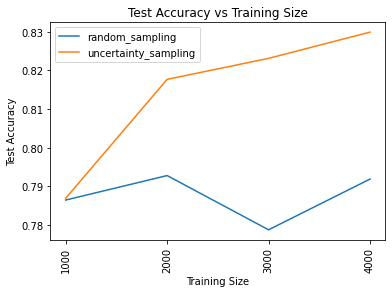

In [13]:
# plot two curves on the same figure
import matplotlib.pyplot as plt

plt.plot(random_resampling_results)
plt.plot(uncertainty_sampling_results)
plt.legend(["random_sampling", "uncertainty_sampling"])

x = range(len(random_resampling_results)); assert len(uncertainty_sampling_results) == len(random_resampling_results)
plt.xticks(x, [(i+1)*1000 for i in x], rotation='vertical')

plt.xlabel("Training Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Training Size")
plt.show()
plt.show()